In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [52]:

# Load the dataset
data = pd.read_csv("Advertising.csv")

# Display the first few rows of the dataset
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [53]:

# Define features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values.reshape(-1, 1)

In [72]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Verification des dimensions
print(X.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)


(200, 3)
(200, 1)
(200, 1)


In [56]:

# Création de la matrice X, inclut le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (X.shape[0], 1)

print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


In [57]:
# Initialisation du vecteur theta aléatoire, avec 4 éléments (car X a quatre colonnes maintenant)
theta = np.random.randn(4, 1)
theta


array([[ 0.78984912],
       [ 0.54709349],
       [-0.6587454 ],
       [-0.39793866]])

In [58]:
# Model function
def model(X, theta):
    return X.dot(theta)

In [59]:

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [60]:

# Gradient function
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [61]:

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [62]:

# Train the model
n_iterations = 100000
learning_rate = 0.00003

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

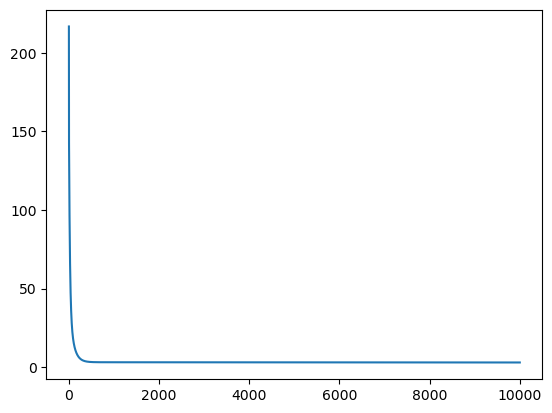

In [63]:



# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final
#%matplotlib notebook

# affiche les noms des axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
plt.plot(range(n_iterations), cost_history)
plt.show()

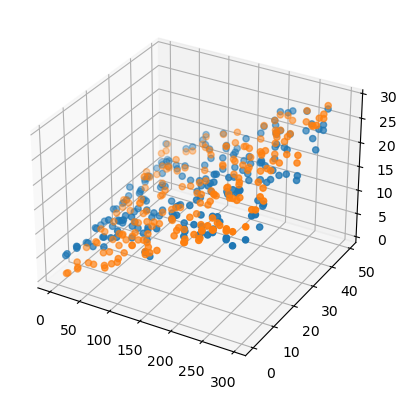

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.scatter(X[:,0], X[:,1], predictions)

In [65]:

def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination(y, predictions) 

0.7809949288382675

In [66]:

# Make predictions
predictions = model(np.hstack((X_test, np.ones((X_test.shape[0], 1)))), theta_final)

In [67]:


# Evaluate the model
r2 = r2_score(y_test, predictions)

In [68]:

# Print the coefficients
coefficients = theta_final[:-1].flatten()
intercept = theta_final[-1]
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [0.06758106 0.16217849 0.02955109]
Intercept: [-0.18477741]


In [69]:

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.7695290184543293


In [70]:

# Display correlation matrix
correlation_matrix = np.corrcoef(X_train[:, :-1], rowvar=False)

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[1.         0.07684067]
 [0.07684067 1.        ]]


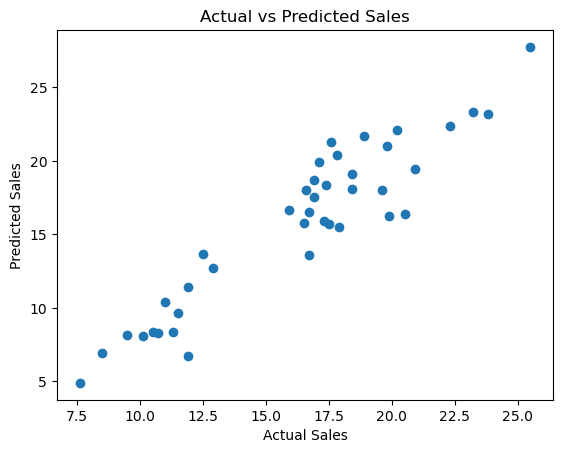

In [71]:



# Plot predictions vs actual
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()